<a href="https://colab.research.google.com/github/PabloCavanzo/MetodosI_AntonioMorillo_PabloCavanzo/blob/main/Tarea%20m%C3%ADnimos%20cuadrados/9_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

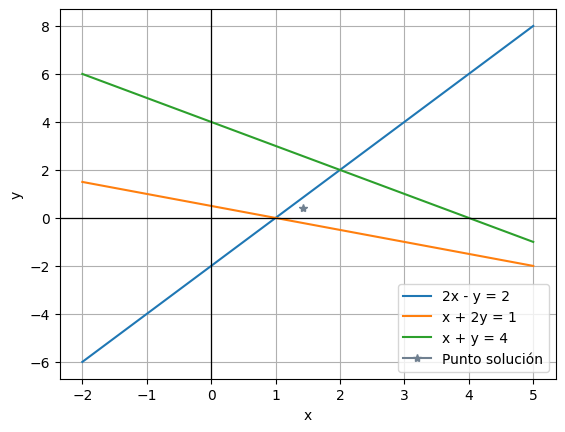

Punto solución: [1.42857143 0.42857143]


In [9]:
# A
A = np.array([[2, -1],
              [1, 2],
              [1, 1]])
b = np.array([2, 1, 4])
A_T = A.T

AtA = A_T @ A
Atb = A_T @ b

Slsn = np.linalg.solve(AtA, Atb)

x = np.linspace(-2,5,300)

y1 = 2*x - 2
y2 = 0.5 - (x/2)
y3 = 4 - x

plt.plot(x, y1, label='2x - y = 2')
plt.plot(x, y2, label='x + 2y = 1')
plt.plot(x, y3, label='x + y = 4')
plt.plot(Slsn[0], Slsn[1],marker='*',color='slategrey', label='Punto solución')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.9)
plt.axvline(0, color='black', linewidth=0.9)
plt.legend()
plt.grid()
plt.show()
print('Punto solución: {}'.format(str(Slsn)))

¿Que interpretacion puede dar?:

Se puede interpretar que, aunque claramente las rectas no se intersectan en un solo punto, al aplicar el método de mínimos cuadrados encontramos un pounto que minimiza la suma de los errores cuadráticos respecto a las tres líneas, es decir, es la mejor aproximacion que se puede obtener de la intersepcion entre las tres rectas. Es decir este punto es el punto que está más cercano de satisfacer las tres ecuaciones simultáneamente. Además, se puede decir que este punto es, o al menos hasta cierta aproximación, el punto más cercano a las tres rectas simultáneamente.

Mínimo en: (1.4264, 0.4254, 2.5355)


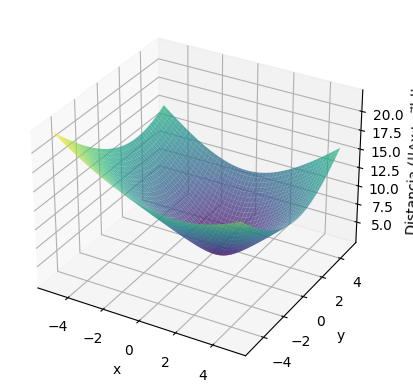

In [10]:
# B
X0 = np.linspace(-5,5,1000) # para un paso de h=0.01 en el intervalo [-5,5], se necesitan 1000 datos exactamente
Y0 = np.linspace(-5,5,1000)
Z = np.zeros((len(X0),len(Y0)))
def distancia(A,vx,B):
  return np.linalg.norm(A@vx - B)

for i, valor_X in enumerate(X0):
    for j, valor_Y in enumerate(Y0):
        v = np.array([valor_X, valor_Y])
        distancia_A = distancia(A,v,b)
        Z[i,j] = distancia(A,v,b)
indice_min = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
x_minimo = X0[indice_min[0]]
y_minimo = Y0[indice_min[1]]

X0, Y0 = np.meshgrid(X0, Y0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0, Y0, Z, cmap='viridis',alpha=0.75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia (||Ax∗ −⃗b||',)
print('Mínimo en: {}'.format(str((round(x_minimo,4),round(y_minimo,4),round(Z[indice_min],4)))))